In [1]:
from problem3 import get_all_info, compute_all_scores, plot_ranking

In [2]:
country_codes = ["US", "TH", "NZ", "CN", "AE"]

In [3]:
all_info = get_all_info(country_codes=country_codes)

[US] Solving distribution center took 5.65 s
[US] Sentiment analysis took 0.13 s
[TH] Solving distribution center took 1.99 s
[TH] Sentiment analysis took 0.05 s
[NZ] Solving distribution center took 2.19 s
[NZ] Sentiment analysis took 0.11 s
[CN] Solving distribution center took 2.63 s
[CN] Sentiment analysis took 0.1 s
[AE] Solving distribution center took 1.49 s
[AE] Sentiment analysis took 0.11 s
Total elapsed time : 14.45 s


In [4]:
all_info

{'US': {'dist': 15639.036747, 'sent': 0.31155778894472363},
 'TH': {'dist': 3287.9693159999997, 'sent': 0.532608695652174},
 'NZ': {'dist': 4555.222694000001, 'sent': 0.3559322033898305},
 'CN': {'dist': 5844.274147, 'sent': 0.35074626865671643},
 'AE': {'dist': 543.0738249999999, 'sent': 0.9393939393939393}}

In [5]:
final_ranking = compute_all_scores(all_info, country_codes)

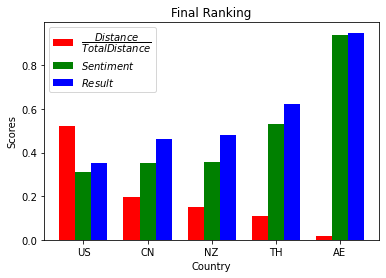

In [7]:
plot_ranking(final_ranking)